In [ ]:
import numpy as np
from os import listdir
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Cargar imágenes usando la función del primer notebook
def Cargar_img(directorio: str, img_size: tuple[int, int], color_mode: str):
    import numpy as np
    from os import listdir
    import os
    import tensorflow as tf

    X, y = [], []
    class_names = listdir(directorio)
    for i, img_fold in enumerate(class_names):
        images_path = listdir(os.path.join(directorio, img_fold))
        y.extend([i] * len(images_path))
        for img_name in images_path:
            image = tf.keras.utils.load_img(
                os.path.join(directorio, img_fold, img_name),
                color_mode=color_mode,
                target_size=img_size,
                interpolation="nearest",
                keep_aspect_ratio=False,
            )
            image = tf.keras.utils.img_to_array(image, data_format="channels_last").astype(np.uint8)
            X.append(image)

    print("Clases encontradas:", class_names)
    X = np.array(X)
    y = np.array(y)
    return X, y,class_names

# Definir el tamaño de imágenes y cargar los datos
dataset_path = "/content/drive/MyDrive/RedesNeuronales/ecommerce products"
target_size = (256, 256)

# Cargar imágenes en arrays X e y
X, y,clases = Cargar_img(dataset_path, target_size, color_mode="rgb")

# Normalizar imágenes
X = X / 255.0

# Dividir en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Clases encontradas: ['jeans', 'tv', 'tshirt', 'sofa']


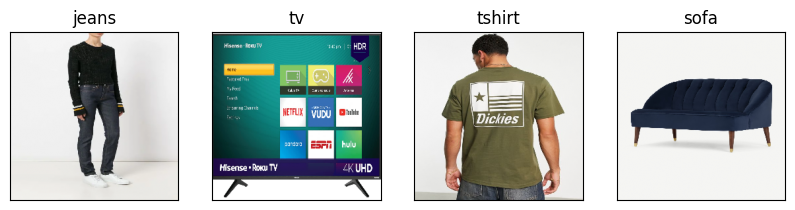

In [ ]:
_, axes = plt.subplots(1, 4, figsize=(10,10))
for i in range(len(clases)):
    axes[i].imshow(X[ y == i ][0])
    axes[i].set_title(clases[i])

    axes[i].xaxis.set_tick_params(labelbottom=False)
    axes[i].yaxis.set_tick_params(labelleft=False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

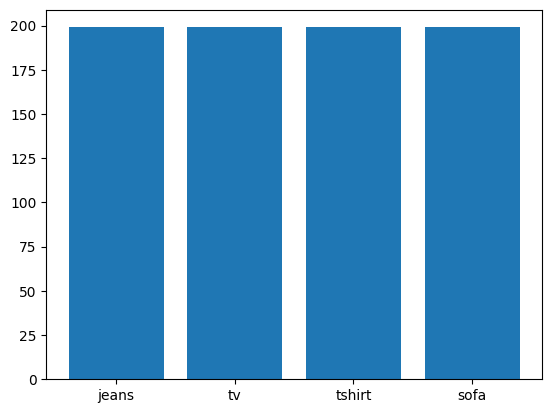

In [ ]:
plt.figure()

plt.bar(clases, np.bincount(y))

plt.show()

In [ ]:
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [ ]:
import tensorflow as tf

modelo = tf.keras.Sequential([

    # 🔹 Primera capa convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=img_shape),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 🔹 Segunda capa convolucional
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # 🔹 Tercera capa convolucional
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # 🔹 Cuarta capa convolucional
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    # 🔹 Capa densa totalmente conectada
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(clases), activation='softmax')  # len(clases) → Número de categorías
])

modelo.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 76,516,420 (291.89 MB)

 Trainable params: 76,516,420 (291.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_data_augmenter = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,              # Aumenta el rango de rotación
    shear_range=0.2,                # Aumenta el rango de corte (shear)
    horizontal_flip=True,           # Flip horizontal
    vertical_flip=True,             # Flip vertical
    fill_mode='nearest',            # Relleno cercano para pixeles
    validation_split=0.2            # 20% de las imágenes para validación
  )

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Compilacion
modelo.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
CB = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
]

# Entrenamiento
history = modelo.fit(
    train_data_augmenter.flow(X_train, y_train, subset="training"),
    validation_data = train_data_augmenter.flow(X_train, y_train, subset="validation"),
    epochs = 60,
    callbacks = CB,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.2708 - loss: 1.4248 - val_accuracy: 0.3228 - val_loss: 1.3862
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.2704 - loss: 1.3831 - val_accuracy: 0.1811 - val_loss: 1.3769
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 837ms/step - accuracy: 0.4074 - loss: 1.2667 - val_accuracy: 0.7165 - val_loss: 0.9645
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 775ms/step - accuracy: 0.6649 - loss: 0.8750 - val_accuracy: 0.6535 - val_loss: 0.8179
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.7364 - loss: 0.7371 - val_accuracy: 0.7323 - val_loss: 0.6540
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 789ms/step - accuracy: 0.7821 - loss: 0.6026 - val_accuracy: 0.8189 - val_loss: 0.5478
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step - accuracy: 0.8310 - loss: 0.5443 - val_accuracy: 0.7874 - val_loss: 0.6027
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 0.8254 - loss: 0.5042 - val_accura

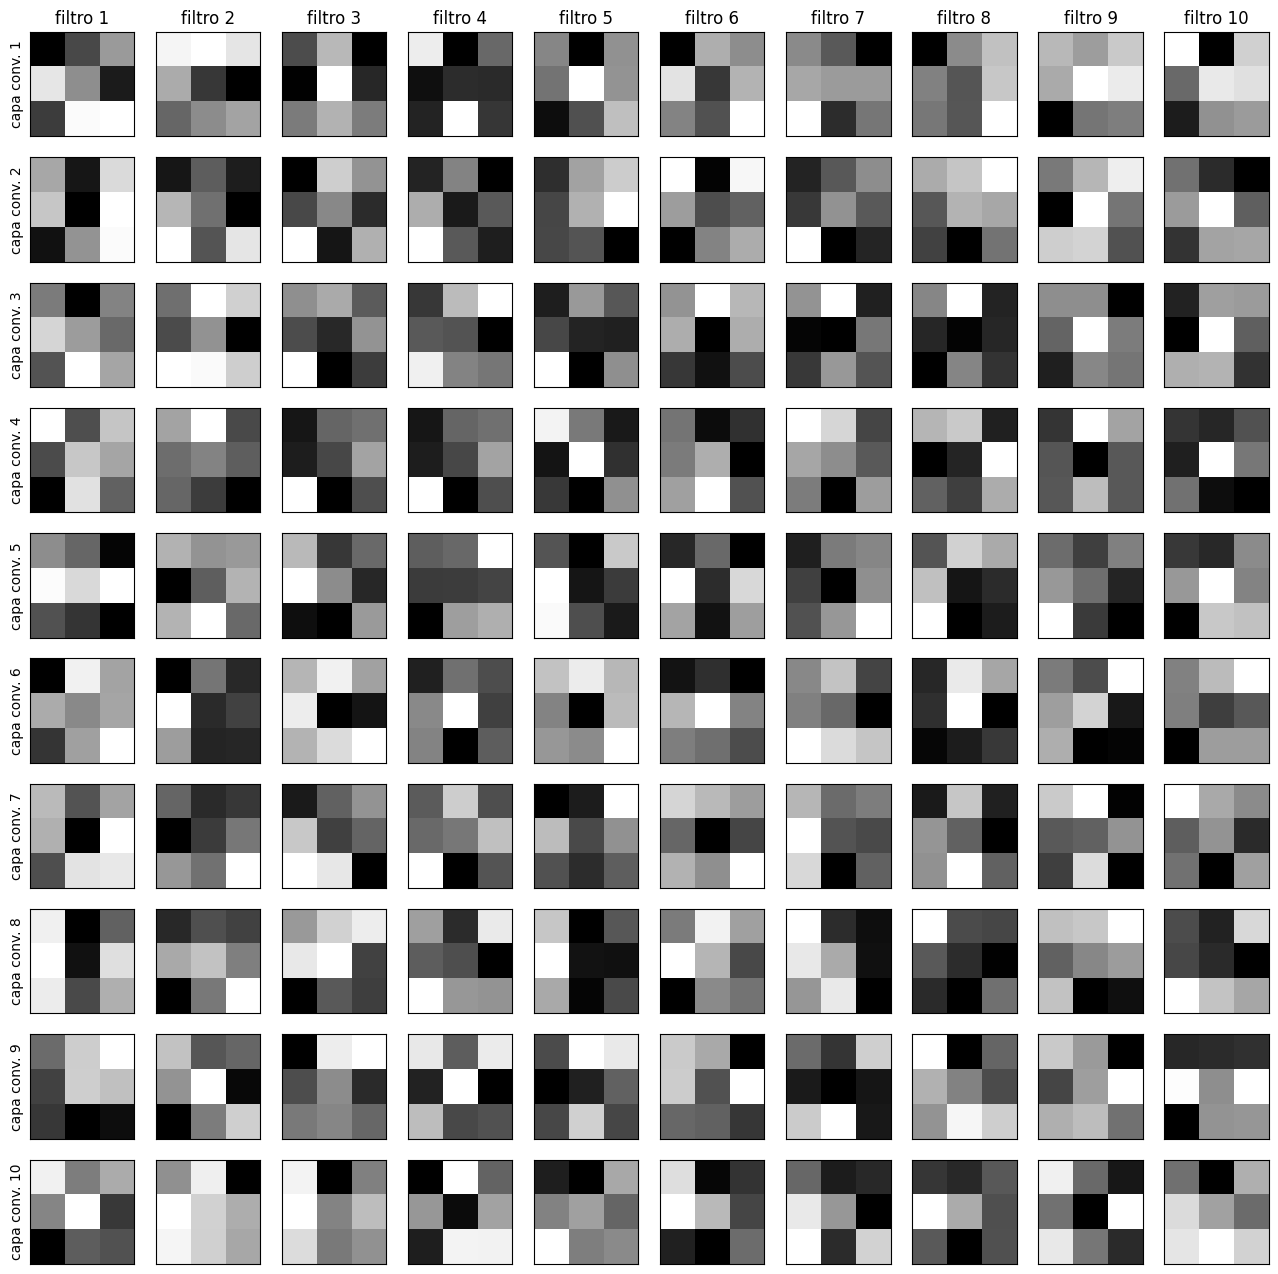

In [ ]:
# filtrar capas convolucionales
conv_layers = [layer for layer in modelo.layers if "conv" in layer.name ]

np.random.seed(1)

_, axes = plt.subplots(len(conv_layers), 10, figsize=(16,16))

for i, layer in enumerate(conv_layers):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"filtro {i+1}")

    # obtener los filtros de cada capa convolucional
    filters, biases = layer.get_weights()
    # reescalar filtros para poder ser visualizados
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # obtener 4 filtros al azar para ser visualizados
    sel = np.random.randint(0, filters.shape[-1], 10)
    filters_selected = filters[:,:,:, sel]
    filters_selected = np.moveaxis(filters_selected, -1, 0)
    filters_selected = np.mean(filters_selected, axis=3, keepdims=True)
    # filters_selected = filters_selected[:,:,:,0]
    for j, filter in enumerate(filters_selected):
        # visualizar filtro
        axes[i,j].imshow(filter, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


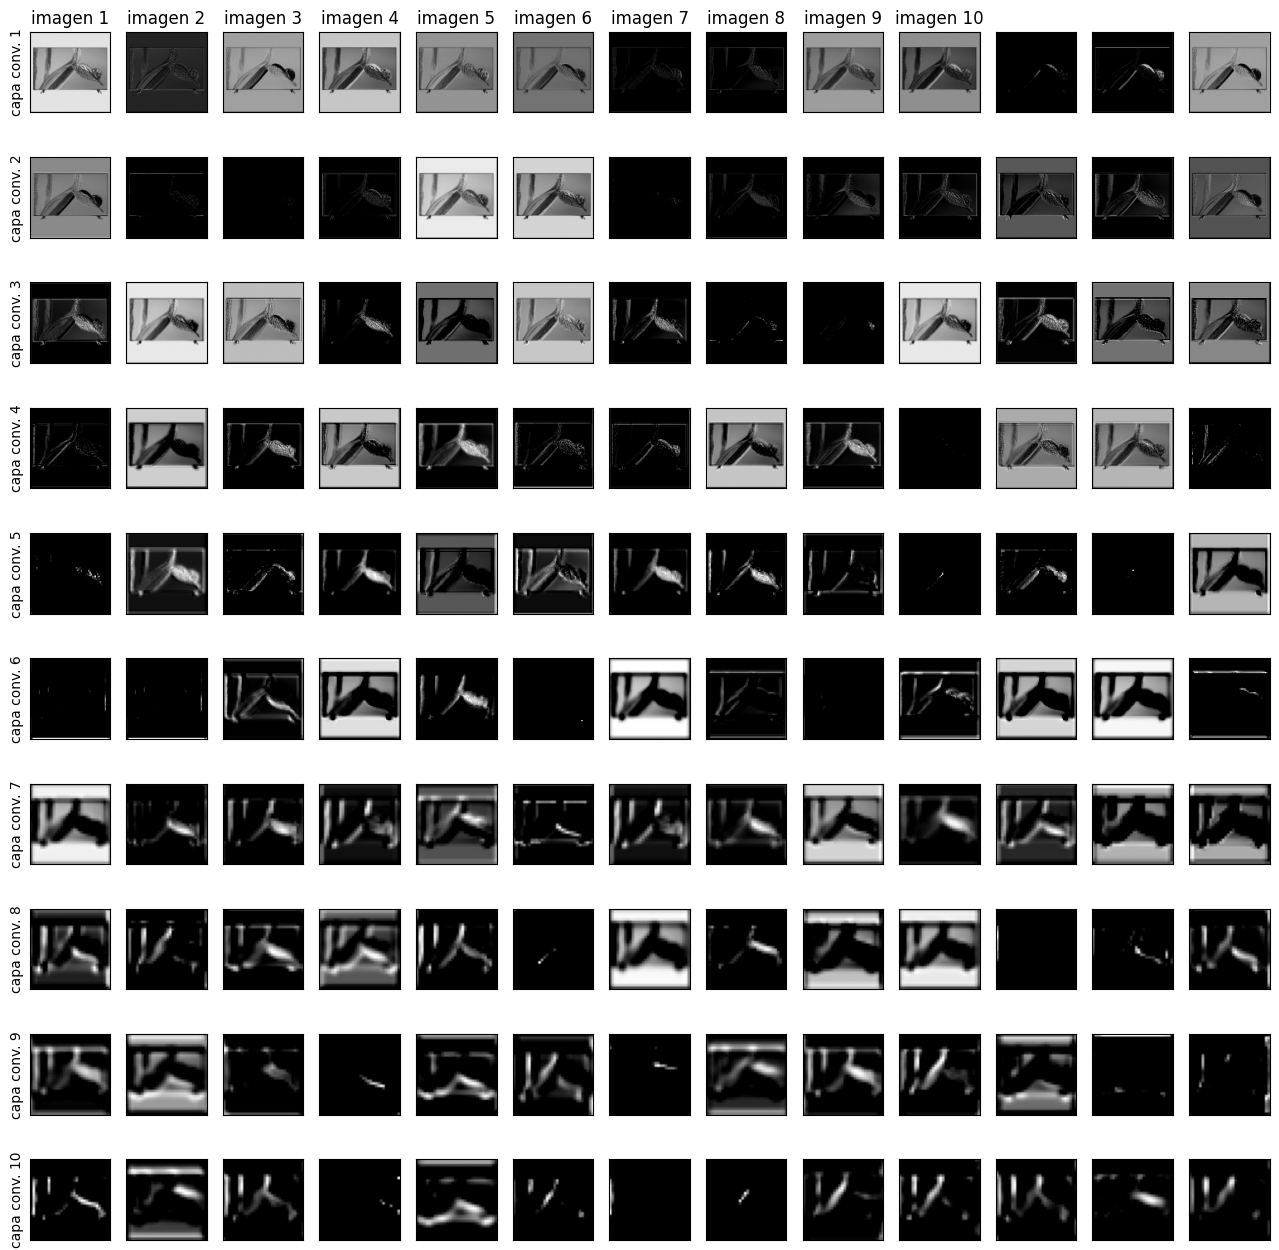

In [ ]:
_, axes = plt.subplots(len(conv_layers), 13, figsize=(16,16))

np.random.seed(3)

# modelo que nos dara la salida de cada capa convolucional
vis_model = tf.keras.models.Model(
    inputs = modelo.inputs,
    outputs = [ layer.output for layer in conv_layers ]
)

# aplicar el modelo hasta cada capa convolucional
feature_maps = vis_model.predict(np.expand_dims(X_val[30], axis=0))

for i, f_map in enumerate(feature_maps):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"imagen {i+1}")

    # filtrar imagenes resultantes sin caracteristicas extraidas
    f_map = f_map[:,:,:, np.any(f_map[0,:,:,:] > 0, axis=(0,1)) ]

    # seleccionar 4 imagenes con el filtro aplicado para mostrar
    sel = np.random.randint(0, f_map.shape[-1], 13)
    feature_map_selected = f_map[:,:,:, sel]
    feature_map_selected = feature_map_selected[0]
    feature_map_selected = np.moveaxis(feature_map_selected, -1, 0)
    for j, image in enumerate(feature_map_selected):
        # visualizar imagen
        axes[i,j].imshow(image, cmap='gray')

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

In [ ]:
import numpy as np
def plot_imagen_classification(modelo, imagen, clases, y_true=None):
    if len(imagen.shape) == 3:
        imagen = np.expand_dims(imagen, axis=0)

    predictions = modelo.predict(imagen)
    predicted_class = np.argmax(predictions)

    fig, (img_ax, prob_ax) = plt.subplots(1, 2, figsize=(10,3))

    img_ax.imshow(imagen[0], cmap=plt.get_cmap('gray'))

    img_ax.xaxis.set_tick_params(labelbottom=False)
    img_ax.yaxis.set_tick_params(labelleft=False)
    img_ax.set_xticks([])
    img_ax.set_yticks([])

    prob_ax.bar(clases, predictions[0], label="otras clases", color="blue")
    prob_ax.bar(clases[predicted_class], predictions[0, predicted_class], label=f"predicha ({clases[predicted_class]})", color="red")

    if y_true != None:
        prob_ax.bar(clases[y_true], predictions[0, y_true], label=f"verdadera ({clases[y_true]})", color="green")

    prob_ax.legend()
    prob_ax.set_ylabel("probabilidad")

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


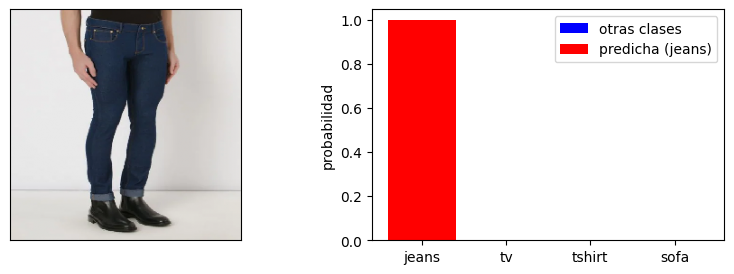

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


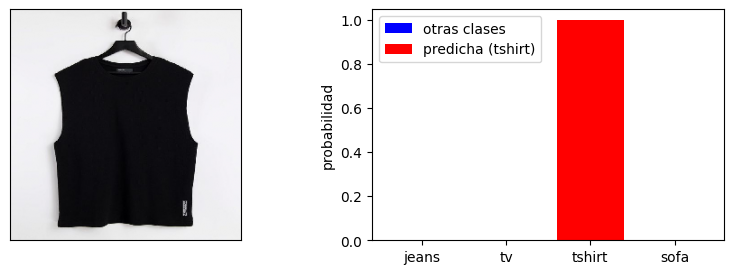

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


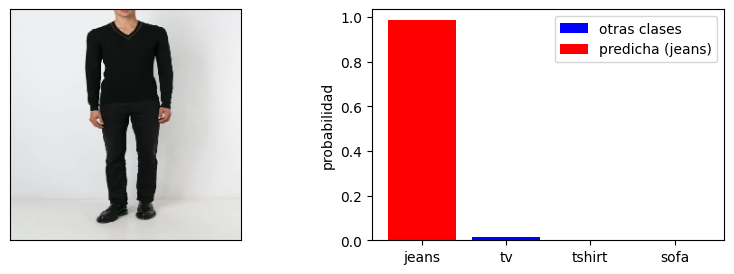

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


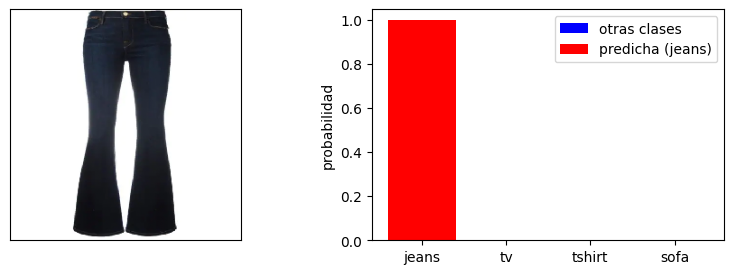

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


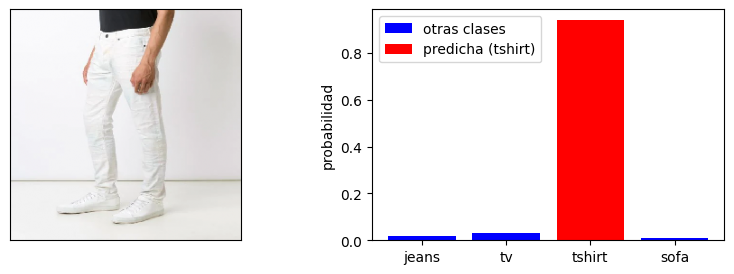

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


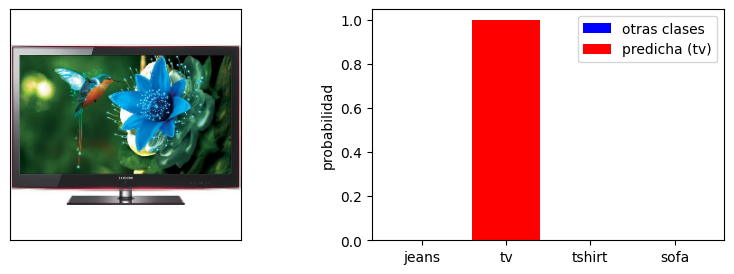

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


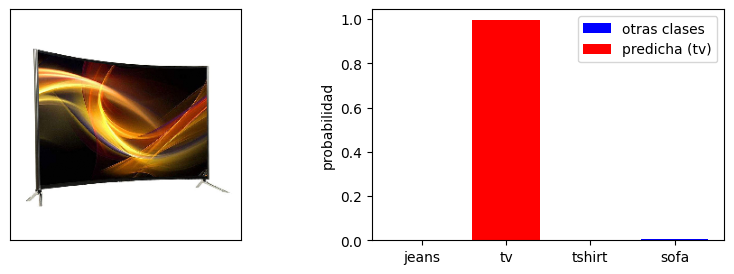

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


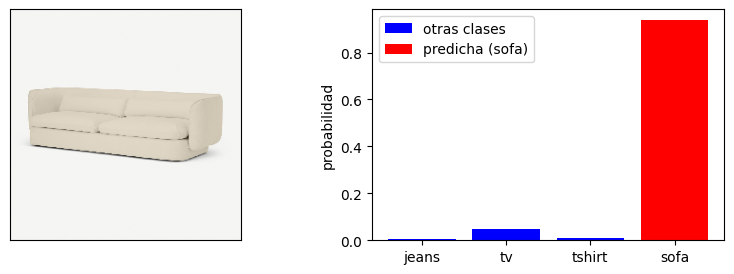

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


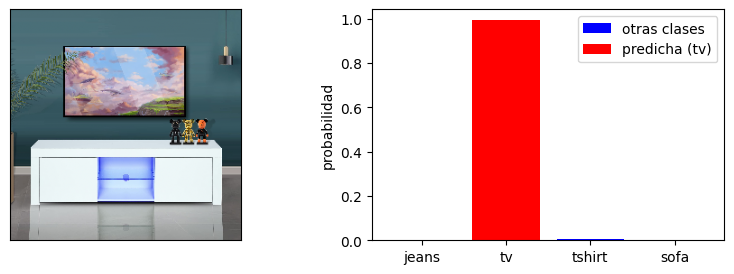

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


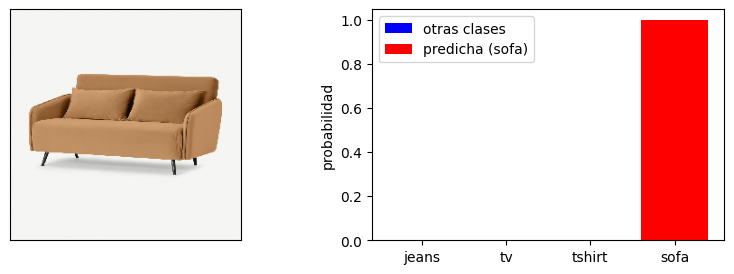

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


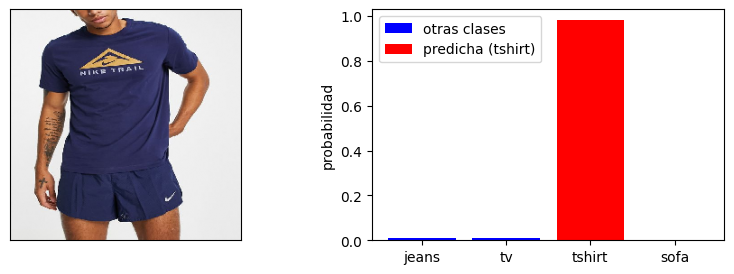

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


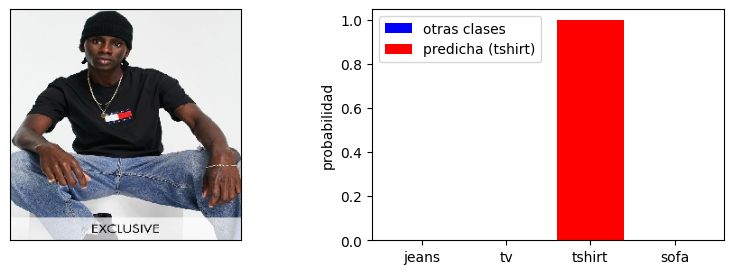

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


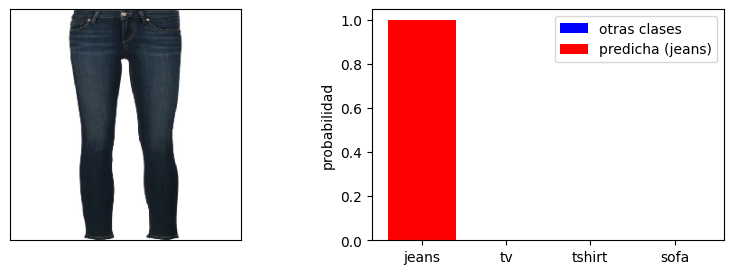

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


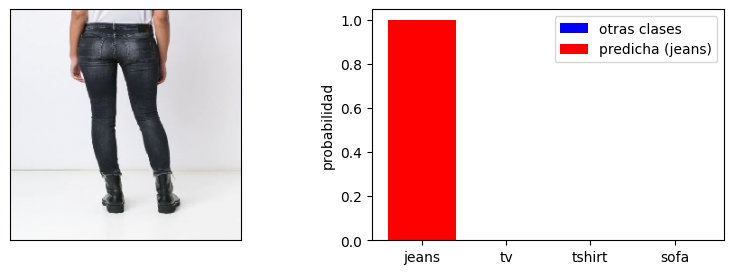

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


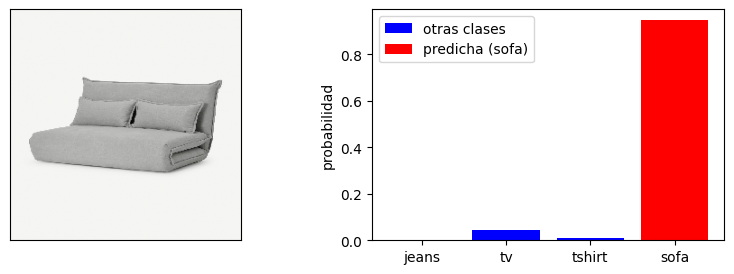

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


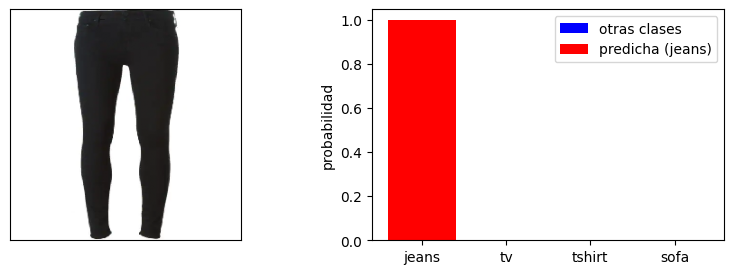

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


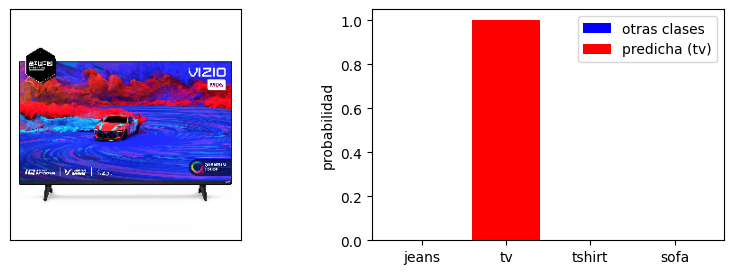

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


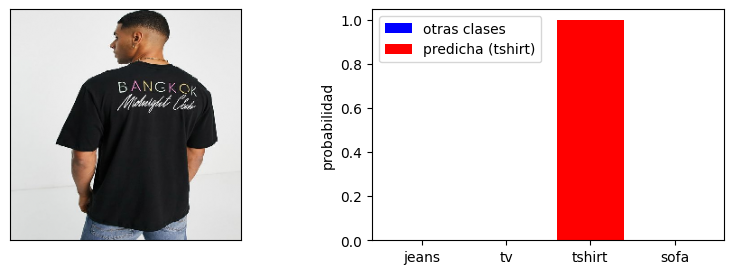

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


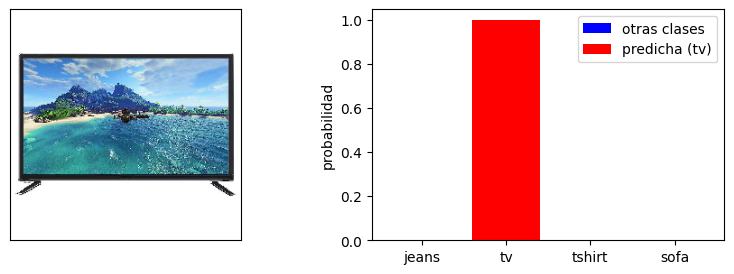

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


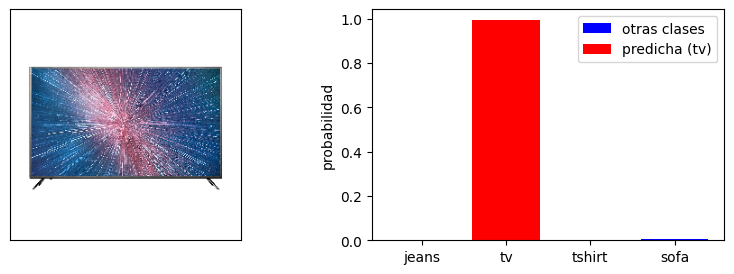

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


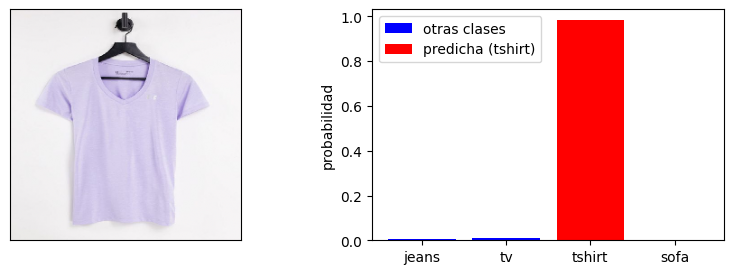

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


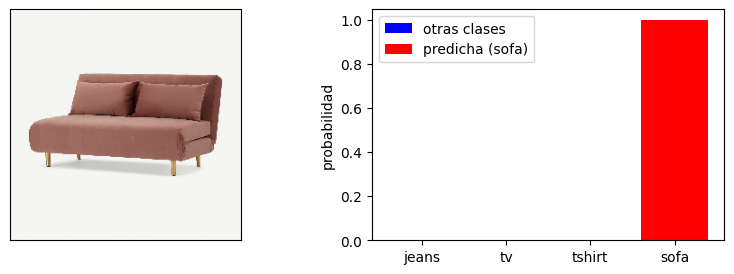

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


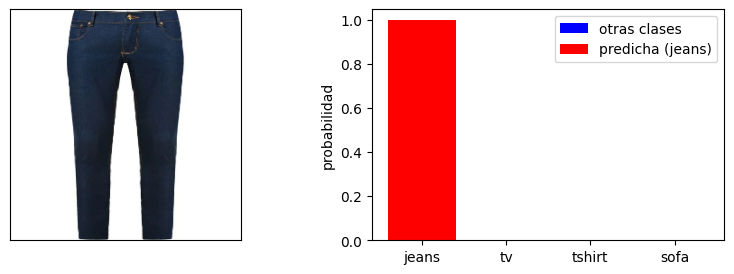

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


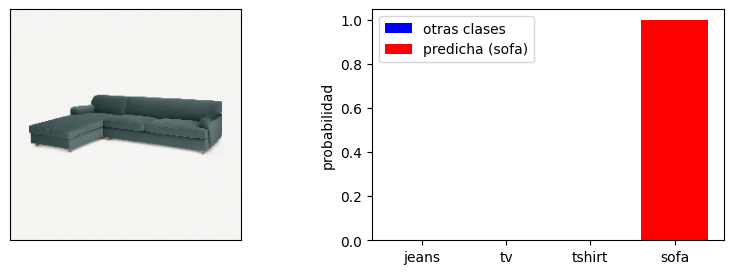

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


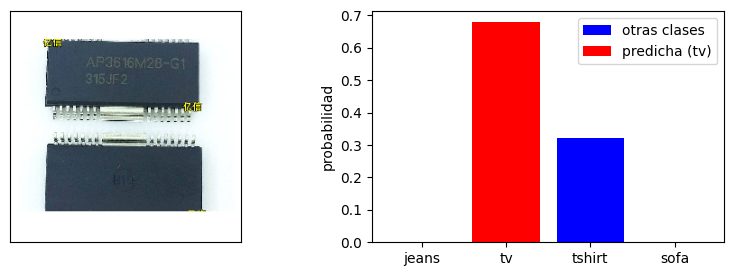

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


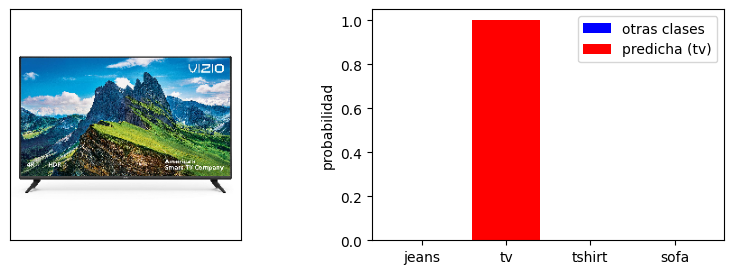

In [ ]:
for i in range(100, 126):
  #print(len(x_test[i].shape))
  plot_imagen_classification(modelo, X_val[i], clases)

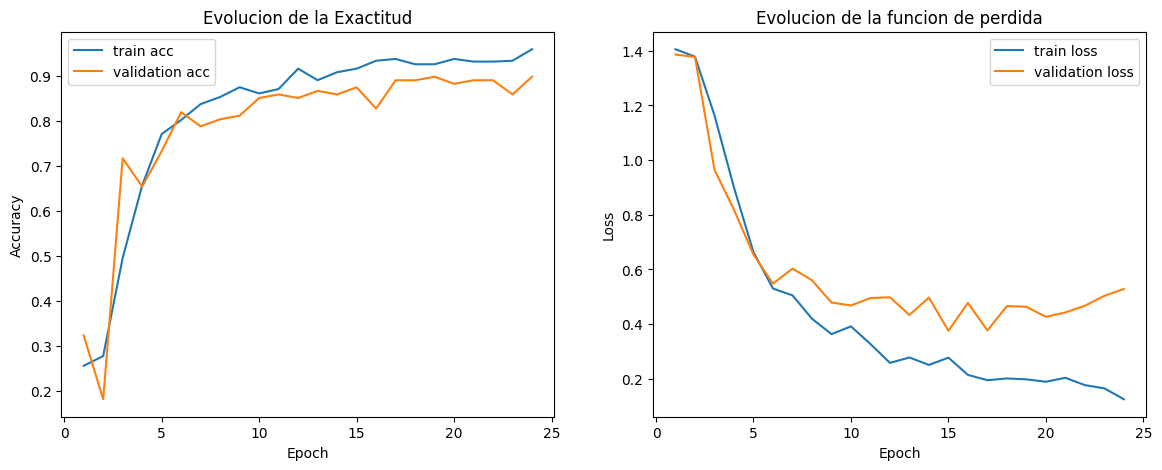

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()


ENTRENAMIENTO Y VALIDACION:

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 864ms/step
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       163
           1       0.96      0.85      0.90       160
           2       0.87      0.99      0.93       159
           3       0.96      1.00      0.98       154

    accuracy                           0.94       636
   macro avg       0.94      0.94      0.94       636
weighted avg       0.94      0.94      0.94       636


PRUEBA:

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.94      0.79      0.86        39
           2       0.84      0.95      0.89        40
           3       0.92      1.00      0.96        45

    accuracy                           0.91       160
   macro avg       0.91      0.90      0.90       160
weighted avg       0.91      0.91      0.90       160



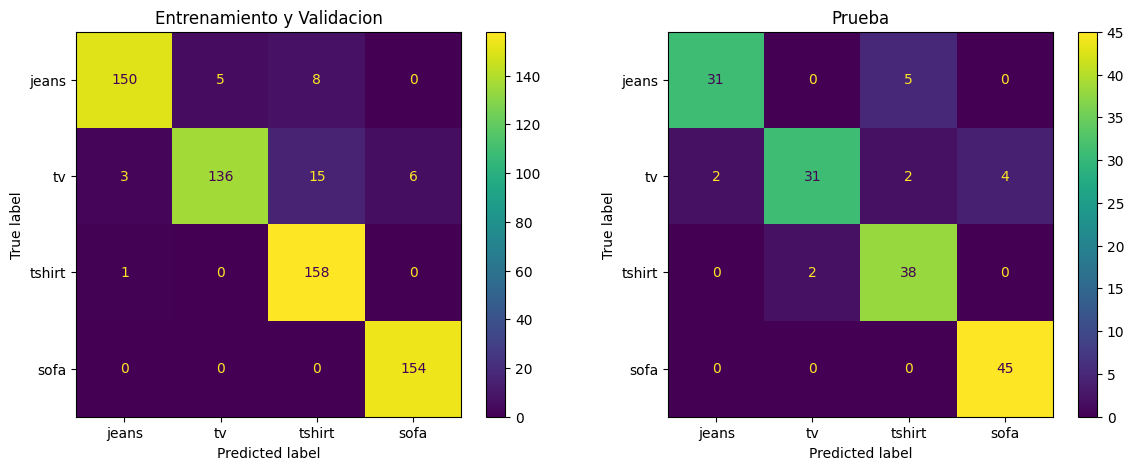

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

print("\nENTRENAMIENTO Y VALIDACION:\n")

y_pred = np.argmax(modelo.predict(X_train), axis=1)

print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_train,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax1
)
ax1.set_title("Entrenamiento y Validacion")

print("\nPRUEBA:\n")

y_pred = np.argmax(modelo.predict(X_val), axis=1)

print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_val,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax2
)
ax2.set_title("Prueba")

plt.show()

In [ ]:
import tensorflow as tf

# Suponiendo que tu modelo está en la variable `modelo`
modelo.save("modelo_clasificacion.keras")


In [ ]:
import tensorflow as tf

# Cargar el modelo original
modelo = tf.keras.models.load_model("modelo_clasificacion.keras")

In [ ]:
!split -b 100M modelo_clasificacion.keras modelo_completo_part_

In [ ]:
!cat modelo_completo_part_* > modelo_reconstruido.keras

In [ ]:
modelo_cargado = tf.keras.models.load_model("modelo_reconstruido.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saving images.jpg to images.jpg
Imagen cargada: images.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


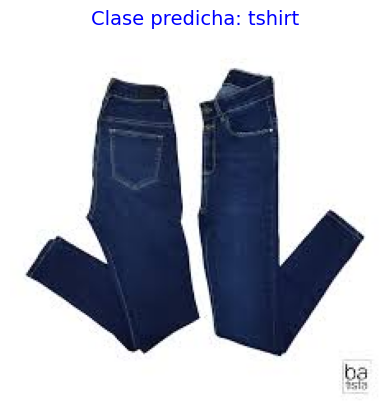

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# 🚀 Subir una imagen desde tu computadora
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Obtener nombre del archivo subido
print("Imagen cargada:", image_path)

# 🎨 Función para preprocesar la imagen
def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Convertir a RGB si es necesario
    image = image.resize(target_size)  # Redimensionar
    image = np.array(image) / 255.0  # Normalizar (0-1)
    image = np.expand_dims(image, axis=0)  # Añadir dimensión batch
    return image

# 🚀 Cargar el modelo previamente guardado
modelo = tf.keras.models.load_model("modelo_clasificacion.keras")

# 🔄 Preprocesar la imagen
image = preprocess_image(image_path)

# 🔍 Hacer la predicción
prediccion = modelo.predict(image)

# 📌 Obtener la clase con mayor probabilidad
clase_predicha = np.argmax(prediccion)

# 📸 Mostrar la imagen con la clasificación
plt.imshow(Image.open(image_path))
plt.axis("off")  # Ocultar ejes
plt.title(f"Clase predicha: {clases[clase_predicha]}", fontsize=14, color="blue")
plt.show()
